In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
path = os.path.realpath(os.path.join(os.getcwd(),'../'))
sys.path.insert(0, path)
import astro_datasets

/Users/adammoss/opt/anaconda3/envs/astro_datasets/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds_train, info_train = tfds.load(name='slc/space', split='train', with_info=True, as_supervised=True)
ds_test, info_test = tfds.load(name='slc/space', split='test', with_info=True, as_supervised=True)

2022-09-08 16:14:21.076768: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def normalize(image, label):  
  image = (image - 4.3368458e-13) / 5.503901e-12
  return image, label

In [4]:
ds_train = ds_train.map(normalize)
ds_test = ds_test.map(normalize)

In [5]:
x = np.stack([x for x, y in ds_train])
print(len(x), np.mean(x), np.std(x))

20000 -1.2008836e-07 1.0000012


In [6]:
x = np.stack([x for x, y in ds_test])
print(len(x), np.mean(x), np.std(x))

20000 -0.019080857 0.92817616


tf.Tensor(1, shape=(), dtype=int64)


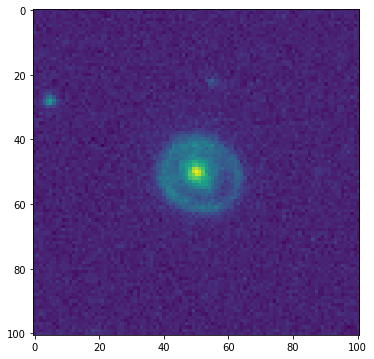

tf.Tensor(1, shape=(), dtype=int64)


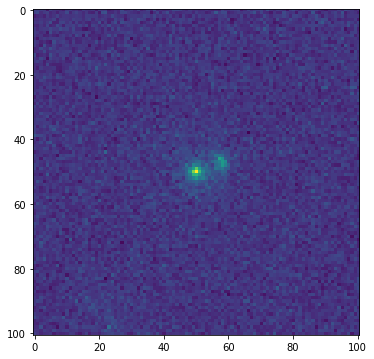

In [7]:
for d in ds_train.take(2):
    inputs, label = d
    print(label)
    plt.figure(figsize=(6, 6))
    plt.imshow(inputs[:,:,0])
    plt.show()